In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [30]:
df = pd.read_csv('final_asset_classes.csv', index_col=0, parse_dates=True)

In [31]:
df.tail()

FTSEREEL   LPX50PE  GlobalPE  MSCI World  FTSECORP  \
Date                                                             
2024-10-31  1.259789  3.956973  0.619921    2.973632  1.581817   
2024-11-01  1.264424  3.951251  0.618668    2.997652  1.579966   
2024-11-04  1.255679  3.907115  0.614021    2.982624  1.582208   
2024-11-05  1.252976  3.972100  0.615709    2.998047  1.579558   
2024-11-06  1.230426  4.178776  0.648710    3.103464  1.581514   

            ICE BofA EBL0 (Euro Large Cap Corporate)  \
Date                                                   
2024-10-31                                  1.647584   
2024-11-01                                  1.651997   
2024-11-04                                  1.650884   
2024-11-05                                  1.649478   
2024-11-06                                  1.655555   

            ICE BofA G0BC (Corporate World)  ICE BofA HE00 (Euro HY)  \
Date                                                                   
2024-10-31                         1.926196                 2.690366   
2024-11-01                         1.914565                 2.690264   
2024-11-04                         1.927705                 2.690949   
2024-11-05                         1.929431                 2.690446   
2024-11-06                         1.922870                 2.694767   

                  PE  MSCI ACWI  FTWBIGUSDT  ICE BofA ER00 (Euro Corporate)  \
Date                                                                          
2024-10-31  3.956973   2.753638    1.719047                        1.641213   
2024-11-01  3.951251   2.775576    1.721663                        1.645565   
2024-11-04  3.907115   2.763889    1.723644                        1.644461   
2024-11-05  3.972100   2.777648    1.715628                        1.643070   
2024-11-06  4.178776   2.868726    1.730372                        1.649072   

            ICE BofA HW00 (Global HY)  FTSE EPRA Nareit Developed Europe  \
Date                                                                       
2024-10-31                   3.027583                           0.622657   
2024-11-01                   3.027385                           0.624950   
2024-11-04                   3.029835                           0.620625   
2024-11-05                   3.029519                           0.619290   
2024-11-06                   3.032544                           0.608144   

            MSCI EMU  STOXX600  FTSECORPALT  \
Date                                          
2024-10-31  1.290990  1.424035     1.579018   
2024-11-01  1.308660  1.439560     1.583216   
2024-11-04  1.302979  1.434799     1.586472   
2024-11-05  1.301963  1.435700     1.576565   
2024-11-06  1.290496  1.427952     1.584125   

            FTSE EMU Government Bond (EGBI) TRI  
Date                                             
2024-10-31                             1.572049  
2024-11-01                             1.569773  
2024-11-04                             1.573040  
2024-11-05                             1.570630  
2024-11-06                             1.569834

In [32]:
# drop FTSECORP and FTSECORPALT
df.drop(columns=['FTSECORP', 'FTSECORPALT'], inplace=True)

In [33]:
fig = go.Figure()

for column in df.columns:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[column],
        mode='lines',
        name=column,
        line=dict(width=0.75)
    ))

fig.update_layout(
    title="Historical Performance",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Assets",
    # template="plotly_dark"
)

fig.show()

In [34]:
df.describe()

FTSEREEL      LPX50PE     GlobalPE   MSCI World  \
count  4662.000000  4640.000000  4518.000000  4662.000000   
mean      1.019962     1.436992     0.507305     1.432942   
std       0.335977     0.875510     0.159113     0.623226   
min       0.280643     0.199697     0.151889     0.484576   
25%       0.714645     0.744860     0.420058     0.889632   
50%       1.107107     1.201400     0.488292     1.349608   
75%       1.260288     1.770923     0.555482     1.787643   
max       1.728590     4.178776     1.091161     3.103464   

       ICE BofA EBL0 (Euro Large Cap Corporate)  \
count                               4582.000000   
mean                                   1.414177   
std                                    0.240772   
min                                    0.947061   
25%                                    1.193838   
50%                                    1.499624   
75%                                    1.599557   
max                                    1.750294   

       ICE BofA G0BC (Corporate World)  ICE BofA HE00 (Euro HY)           PE  \
count                      4573.000000              4569.000000  4640.000000   
mean                          1.534330                 1.829237     1.436992   
std                           0.315794                 0.549032     0.875510   
min                           0.937071                 0.634080     0.199697   
25%                           1.269572                 1.333941     0.744860   
50%                           1.574102                 1.947671     1.201400   
75%                           1.770960                 2.284300     1.770923   
max                           2.046245                 2.694767     4.178776   

         MSCI ACWI   FTWBIGUSDT  ICE BofA ER00 (Euro Corporate)  \
count  4661.000000  4574.000000                     4596.000000   
mean      1.400666     1.485697                        1.407191   
std       0.561852     0.282234                        0.238680   
min       0.493131     0.928542                        0.948428   
25%       0.915658     1.262808                        1.188459   
50%       1.324619     1.600974                        1.492859   
75%       1.734013     1.701961                        1.591966   
max       2.868726     1.912837                        1.740910   

       ICE BofA HW00 (Global HY)  FTSE EPRA Nareit Developed Europe  \
count                4573.000000                        4660.000000   
mean                    1.962210                           0.687851   
std                     0.616954                           0.173819   
min                     0.697786                           0.257810   
25%                     1.446043                           0.544772   
50%                     1.963051                           0.696934   
75%                     2.504055                           0.814878   
max                     3.036918                           1.190679   

          MSCI EMU     STOXX600  FTSE EMU Government Bond (EGBI) TRI  
count  4662.000000  4612.000000                          4649.000000  
mean      0.914538     0.994399                             1.447014  
std       0.200758     0.221661                             0.255244  
min       0.446476     0.445111                             0.978885  
25%       0.738518     0.808023                             1.196575  
50%       0.934349     1.018822                             1.511604  
75%       1.052883     1.118456                             1.635041  
max       1.363872     1.487968                             1.855926

In [35]:
monthly_stats = df.resample('ME').agg(['mean', 'median', 'min', 'max', 'std'])

yearly_stats = df.resample('YE').agg(['mean', 'median', 'min', 'max', 'std'])

ValueError: Invalid frequency: ME

In [9]:
monthly_stats.head()

MSCI                                          FTSEREEL  \
                mean    median       min       max       std      mean   
Date                                                                     
2006-10-31  0.995498  0.996213  0.989431  1.000866  0.005308  1.002780   
2006-11-30  0.988618  0.992456  0.963691  0.999871  0.009806  1.035286   
2006-12-31  0.991617  0.995139  0.966910  1.006497  0.011125  1.081829   
2007-01-31  1.015581  1.019841  0.997364  1.031024  0.010036  1.124330   
2007-02-28  1.033023  1.037148  0.999410  1.040339  0.010527  1.170521   

                                                    ...  MSCI EMU            \
              median       min       max       std  ...      mean    median   
Date                                                ...                       
2006-10-31  1.001832  1.000000  1.009957  0.003678  ...  1.000306  1.000286   
2006-11-30  1.033385  1.011124  1.062421  0.013083  ...  1.013591  1.016664   
2006-12-31  1.090255  1.033181  1.126006  0.028414  ...  1.025713  1.030169   
2007-01-31  1.123248  1.107100  1.145517  0.011371  ...  1.053986  1.055033   
2007-02-28  1.176179  1.113688  1.195018  0.022775  ...  1.078686  1.081166   

                                          STOXX600                      \
                 min       max       std      mean    median       min   
Date                                                                     
2006-10-31  0.997236  1.002506  0.001941  0.999188  0.999507  0.995604   
2006-11-30  0.991986  1.028074  0.011116  1.005916  1.009777  0.984897   
2006-12-31  0.989954  1.042002  0.015193  1.015855  1.021274  0.984249   
2007-01-31  1.037226  1.065357  0.007991  1.045698  1.048014  1.025190   
2007-02-28  1.043535  1.091920  0.011404  1.067353  1.070640  1.028543   

                                
                 max       std  
Date                            
2006-10-31  1.003128  0.003041  
2006-11-30  1.017301  0.009551  
2006-12-31  1.032178  0.015443  
2007-01-31  1.059510  0.009416  
2007-02-28  1.076895  0.011658  

[5 rows x 80 columns]

In [10]:
yearly_stats.head()

MSCI                                          FTSEREEL  \
                mean    median       min       max       std      mean   
Date                                                                     
2006-12-31  0.990746  0.993976  0.963691  1.006497  0.010090  1.050616   
2007-12-31  1.017501  1.019841  0.921414  1.073263  0.031746  0.997235   
2008-12-31  0.776457  0.807236  0.549564  0.966468  0.102934  0.635486   
2009-12-31  0.626151  0.619922  0.484576  0.728298  0.057342  0.439496   
2010-12-31  0.779240  0.777602  0.708620  0.862870  0.033027  0.558332   

                                                    ...  MSCI EMU            \
              median       min       max       std  ...      mean    median   
Date                                                ...                       
2006-12-31  1.045287  1.000000  1.126006  0.034943  ...  1.017159  1.018589   
2007-12-31  1.004834  0.730931  1.195018  0.133876  ...  1.096096  1.095455   
2008-12-31  0.652918  0.367651  0.802457  0.126656  ...  0.827523  0.850008   
2009-12-31  0.416150  0.280643  0.556527  0.073860  ...  0.615158  0.607026   
2010-12-31  0.549034  0.477979  0.628712  0.038243  ...  0.696191  0.698229   

                                          STOXX600                      \
                 min       max       std      mean    median       min   
Date                                                                     
2006-12-31  0.989954  1.042002  0.014966  1.009075  1.009946  0.984249   
2007-12-31  0.824727  1.162006  0.039194  1.064515  1.062708  0.983883   
2008-12-31  0.521842  1.098812  0.147724  0.791227  0.813976  0.513187   
2009-12-31  0.446476  0.728386  0.075598  0.605609  0.593238  0.445111   
2010-12-31  0.616501  0.745448  0.028577  0.728086  0.728191  0.654015   

                                
                 max       std  
Date                            
2006-12-31  1.032178  0.013133  
2007-12-31  1.127952  0.033099  
2008-12-31  1.014596  0.131002  
2009-12-31  0.715948  0.073099  
2010-12-31  0.793914  0.029651  

[5 rows x 80 columns]

## Now Plotting Dsitrbutions For Daily Returns

Each asset done separately

In [11]:
daily_returns = df.pct_change(fill_method=None).dropna()

In [12]:
daily_returns.describe()

MSCI     FTSEREEL      LPX50PE     GlobalPE  ICE BofA G0BC  \
count  4124.000000  4124.000000  4124.000000  4124.000000    4124.000000   
mean      0.000269     0.000021     0.000343     0.000016       0.000152   
std       0.010393     0.013603     0.013807     0.016998       0.002535   
min      -0.101210    -0.114930    -0.128207    -0.128214      -0.031052   
25%      -0.004376    -0.006458    -0.005304    -0.005937      -0.001163   
50%       0.000723     0.000262     0.001012     0.000863       0.000264   
75%       0.005442     0.006901     0.006908     0.007438       0.001609   
max       0.081038     0.095947     0.127987     0.199407       0.016284   

       ICE BofA EBL0           PE  ICE BofA HW00      FTSEGOV    MSCI ACWI  \
count    4124.000000  4124.000000    4124.000000  4124.000000  4124.000000   
mean        0.000109     0.000343       0.000221     0.000130     0.000244   
std         0.001920     0.013807       0.003256     0.003006     0.010177   
min        -0.021911    -0.128207      -0.047106    -0.016023    -0.097534   
25%        -0.000799    -0.005304      -0.000705    -0.001426    -0.004283   
50%         0.000171     0.001012       0.000432     0.000194     0.000706   
75%         0.001086     0.006908       0.001335     0.001642     0.005311   
max         0.014102     0.127987       0.028941     0.020704     0.078717   

        FTWBIGUSDT    FTSE EPRA  ICE BofA MERHE00  ICE BofA ER00     MSCI EMU  \
count  4124.000000  4124.000000       4124.000000    4124.000000  4124.000000   
mean      0.000172    -0.000135          0.000201       0.000108     0.000142   
std       0.005296     0.013604          0.003396       0.001892     0.015148   
min      -0.030051    -0.115489         -0.054205      -0.021507    -0.260689   
25%      -0.002455    -0.006651         -0.000582      -0.000788    -0.006369   
50%       0.000022     0.000117          0.000348       0.000174     0.000455   
75%       0.002678     0.006805          0.001210       0.001078     0.006936   
max       0.138173     0.091379          0.034930       0.013912     0.321130   

          STOXX600  
count  4124.000000  
mean      0.000104  
std       0.011825  
min      -0.114776  
25%      -0.005057  
50%       0.000518  
75%       0.005857  
max       0.098669

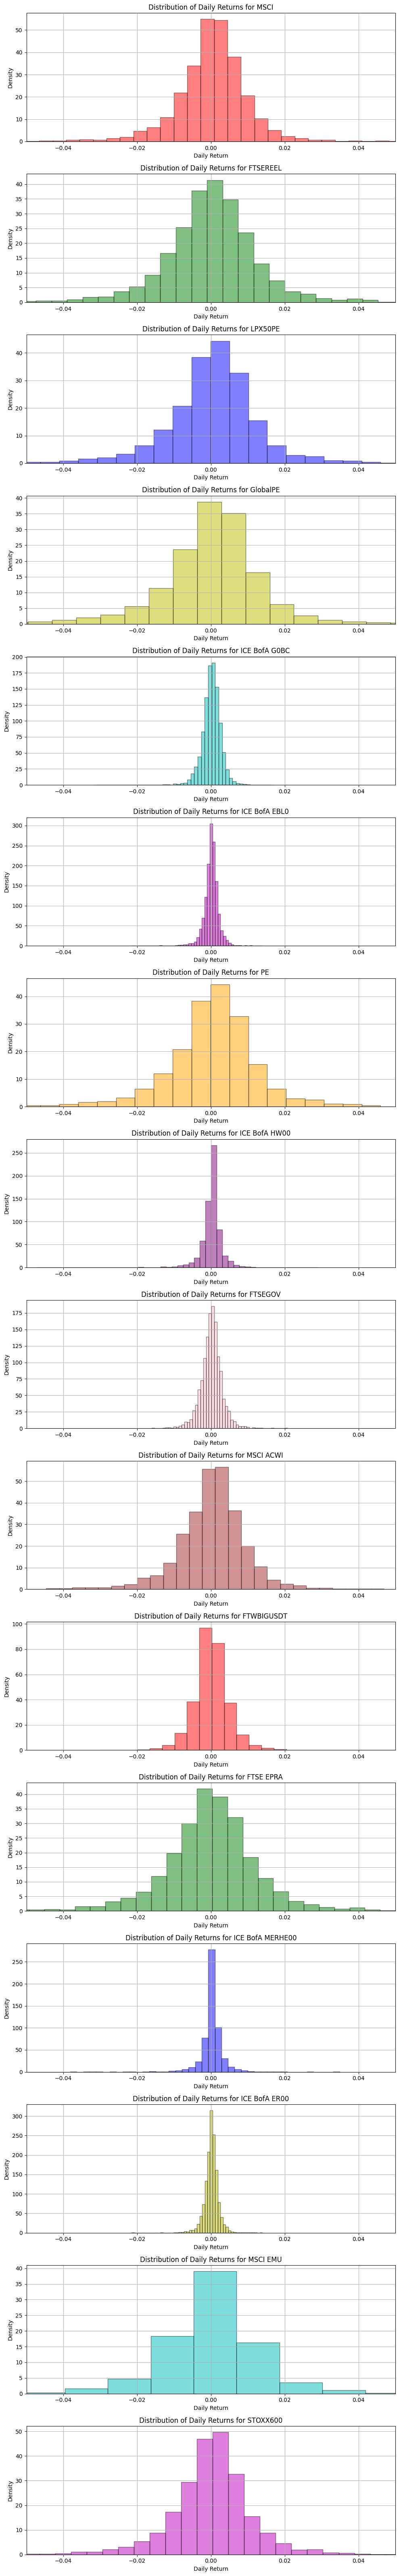

In [13]:

x_min = daily_returns.min().min()  # Overall minimum daily return
x_max = daily_returns.max().max()  # Overall maximum daily return

x_min, x_max = -0.05, 0.05  # Adjust as needed

num_columns = len(daily_returns.columns)


fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 4 * num_columns))


colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']


for i, column in enumerate(daily_returns.columns):
    axes[i].hist(
        daily_returns[column].dropna(),
        bins=50,
        color=colors[i % len(colors)],
        alpha=0.5,
        density=True,
        edgecolor='black'
    )
    axes[i].set_title(f'Distribution of Daily Returns for {column}')
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)
    

    axes[i].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

In [14]:
num_bins = 50
colors = [
    '#636EFA',  # Soft blue
    '#EF553B',  # Soft red
    '#00CC96',  # Soft green
    '#AB63FA',  # Soft purple
    '#FFA15A',  # Soft orange
    '#19D3F3',  # Light blue
    '#FF6692',  # Light pink
    '#B6E880',  # Soft lime green
    '#FF97FF',  # Light magenta
    '#FECB52'   # Soft yellow
]

fig = make_subplots(rows=num_columns, cols=1, subplot_titles=[
                    f'Distribution of Daily Returns for {col}' for col in daily_returns.columns])

# colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'orange', 'purple', 'pink', 'brown']
colors = [
    '#636EFA',  # blue
    '#EF553B',  # red
    '#00CC96',  # green
    '#AB63FA',  # purple
    '#FFA15A',  # orange
    '#19D3F3',  # Light blue
    '#FF6692',  # Light pink
    '#B6E880',  # lime green
    '#FF97FF',  # magenta
    '#FECB52'   # yellow
]

for i, column in enumerate(daily_returns.columns):
    fig.add_trace(
        go.Histogram(
            x=daily_returns[column].dropna(),
            nbinsx=num_bins,
            marker_color=colors[i % len(colors)],
            opacity=0.5,
            histnorm='probability density'
        ),
        row=i+1, col=1
    )
    fig.update_xaxes(range=[x_min, x_max], row=i+1, col=1)
    fig.update_yaxes(title_text="Density", row=i+1, col=1)

fig.update_layout(
    height=400 * num_columns,
    width=800,
    showlegend=False,
    title_text="Distribution of Daily Returns for Each Asset",
)

fig.show()

In [15]:
fig = go.Figure()

for i, column in enumerate(daily_returns.columns):
    fig.add_trace(go.Histogram(
        x=daily_returns[column].dropna(),
        xbins=dict(
            start=x_min,
            end=x_max,
            size=(x_max - x_min) / num_bins  # Fixed bin size for consistency
        ),
        marker_color=colors[i % len(colors)],
        opacity=0.5,
        name=column,
        histnorm='probability density'
    ))

# Update layout for better presentation
fig.update_layout(
    title="Distribution of Daily Returns for All Assets",
    xaxis_title="Daily Return",
    yaxis_title="Density",
    barmode='overlay',  # Overlay all histograms
    xaxis=dict(range=[x_min, x_max]),
    legend_title="Assets"
)

fig.show()

Done in one graph

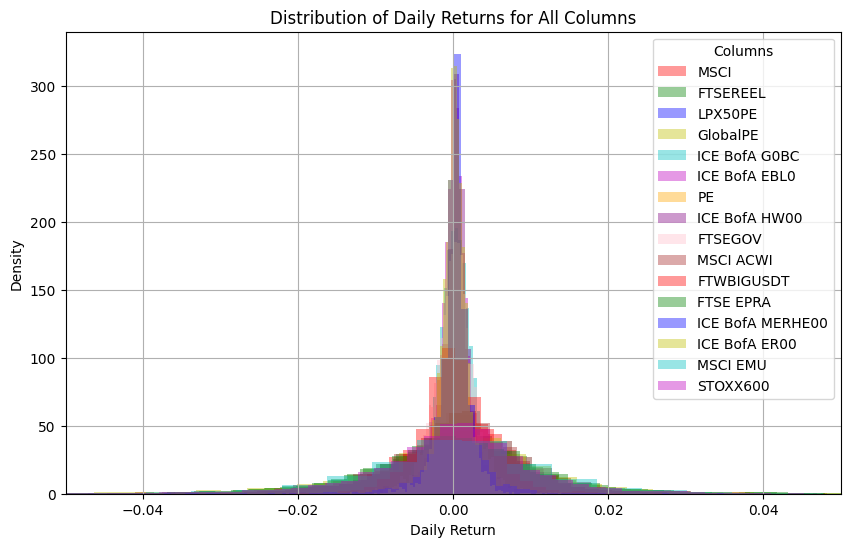

In [16]:
plt.figure(figsize=(10, 6))

# Define colors for each column (extend if necessary)
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']

# Plot histogram for daily returns of each column on the same plot
for i, column in enumerate(daily_returns.columns):
    plt.hist(
        daily_returns[column].dropna(), 
        bins=100, 
        alpha=0.4, 
        color=colors[i % len(colors)],  # Loop through colors if there are more columns than colors
        label=column, 
        density=True  # Show density instead of count
    )

# Set x-axis limits to make the plot narrower
plt.xlim(-0.05, 0.05)  # Adjust this range to control the "narrowness"

# Add title and labels
plt.title('Distribution of Daily Returns for All Columns')
plt.xlabel('Daily Return')
plt.ylabel('Density')

# Add grid and legend
plt.grid(True)
plt.legend(title="Columns", loc='upper right')

# Show the plot
plt.show()

## Correlation Matrix

In [17]:
correlation_matrix = daily_returns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.where(~mask)

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    colorbar_title="Correlation",
    zmin=-1, zmax=1,
    text=np.round(correlation_matrix_masked.values, 2),
    hovertemplate="%{text}",
))
fig.update_layout(
    title="Lower Triangular Correlation Matrix of Daily Returns",
    xaxis=dict(tickangle=45),
    yaxis=dict(autorange="reversed"),
    #template="plotly_dark"
)

fig.show()

### Descriptive stats


In [18]:
summary_stats = pd.DataFrame({
    "Min": daily_returns.min(),
    "Max": daily_returns.max(),
    "Mean": daily_returns.mean(),
    "S.D.": daily_returns.std(),
    "Skewness": daily_returns.skew(),
    "Kurtosis": daily_returns.kurtosis()
})

# Round the results for easier reading
summary_stats = summary_stats.round(4)

# Display the results
summary_stats

Min     Max    Mean    S.D.  Skewness  Kurtosis
MSCI             -0.1012  0.0810  0.0003  0.0104   -0.6076   10.5056
FTSEREEL         -0.1149  0.0959  0.0000  0.0136   -0.2819    5.9940
LPX50PE          -0.1282  0.1280  0.0003  0.0138   -0.5236    9.9743
GlobalPE         -0.1282  0.1994  0.0000  0.0170   -0.0572   15.1313
ICE BofA G0BC    -0.0311  0.0163  0.0002  0.0025   -0.8779    9.3800
ICE BofA EBL0    -0.0219  0.0141  0.0001  0.0019   -0.6372    9.2402
PE               -0.1282  0.1280  0.0003  0.0138   -0.5236    9.9743
ICE BofA HW00    -0.0471  0.0289  0.0002  0.0033   -2.1610   32.3419
FTSEGOV          -0.0160  0.0207  0.0001  0.0030    0.1850    4.4495
MSCI ACWI        -0.0975  0.0787  0.0002  0.0102   -0.6206   10.0903
FTWBIGUSDT       -0.0301  0.1382  0.0002  0.0053    4.3578  113.4421
FTSE EPRA        -0.1155  0.0914 -0.0001  0.0136   -0.2978    5.9214
ICE BofA MERHE00 -0.0542  0.0349  0.0002  0.0034   -2.5374   38.2108
ICE BofA ER00    -0.0215  0.0139  0.0001  0.0019   -0.6308    9.1735
MSCI EMU         -0.2607  0.3211  0.0001  0.0151    0.9175   74.4197
STOXX600         -0.1148  0.0987  0.0001  0.0118   -0.2518    9.3142